In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# Import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing our dataset into a pandas dataframe.
dataset = pd.read_csv('Churn_Modelling.csv')
# Prints the first 5 rows of the dataset.
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Dropping irrelevant columns from the dataset.
dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1, inplace=True)

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Separating the dataset into X and y.
X = dataset.iloc[:,:10] # iloc stands for index location.
y = dataset.iloc[:,10]  # Gives the dataset at the mentioned [row, column]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# We can use one-hot encoding to encode categorical features such as Geography and Gender.
geo = pd.get_dummies(X['Geography'])
geo.head()
# So, we can see that wherever france is the category, we get 1 in france, rest 0.
# Now, we dont need all 3 features since if france and germany are 0, we know it's spain.
# So, we drop spain from the list.
geo.drop(['Spain'], axis=1, inplace=True)

In [ ]:
# Doing the same with gender.
gender = pd.get_dummies(X['Gender'])
gender.drop(['Female'], axis=1, inplace=True) # Removing female because if it's not male, it's female.

In [ ]:
geo.head()

,France,Germany
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [ ]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Now concatenating these features with the original dataframe.
X.drop(['Geography', 'Gender'],axis=1,inplace=True) # Removing Gender and Geography from dataset.
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geo,gender],axis=1)  # Concatenating encoded geography and gender to X

In [ ]:
# Splitting the dataset into training and testing.
from sklearn.model_selection import train_test_split
# test_size determines the ratio in which dataset is split.
# random_state controls shuffling applied to data before splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We need to do feature scaling too to improve our model's performance.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# fit() calculates the mean and standard deviation for later scaling.
# fit_transform() scales the data by doing above function + scaling and outputs a numpy array.
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) 

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.01460667,
        -0.5698444 , -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -1.01460667,
         1.75486502,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.98560362,
        -0.5698444 , -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.98560362,
        -0.5698444 ,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.01460667,
        -0.5698444 , -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.01460667,
         1.75486502, -1.09168714]])

In [ ]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ..., -0.95692675,
         1.62776996, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ...,  1.04501206,
        -0.61433742, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.95692675,
        -0.61433742, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.95692675,
        -0.61433742,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ..., -0.95692675,
         1.62776996,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ..., -0.95692675,
         1.62776996,  0.8981563 ]])

In [ ]:
X_train.shape # Outputs the dimensionality of the array. (rows, columns)

(8000, 11)

In [ ]:
# Data Preprocessing and Scaling is done. Now we are creating the model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input

In [ ]:
# Initializing the ANN
model = Sequential()

# Adding the first layer.
# model.add(Dense(units=11))
model.add(Input(shape=(11,)))
# First Hidden Layer
model.add(Dense(64, activation='relu')) 
# Second Hidden Layer
model.add(Dense(128, activation='relu'))
# Output Layer
model.add(Dense(1, activation='sigmoid'))  

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.compile(opt,loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Implementing Early Stopping. This is a a callback
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", # The value in which change is to be monitored.
    min_delta=0.0001, # Minimum value change required to keep model going. If lower, training stops.
    patience=20,  # Number of epochs after which if no improvement training will be stopped.
    verbose=1,  # Displays a message when callback happens.
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size=16, epochs=100, callbacks=early_stopping)

Epoch 1/100
335/335 [==============================] - 2s 3ms/step - loss: 0.4102 - accuracy: 0.8345 - val_loss: 0.3854 - val_accuracy: 0.8421
Epoch 2/100
335/335 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8507 - val_loss: 0.3923 - val_accuracy: 0.8273
Epoch 3/100
335/335 [==============================] - 1s 3ms/step - loss: 0.3543 - accuracy: 0.8535 - val_loss: 0.3698 - val_accuracy: 0.8474
Epoch 4/100
335/335 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8584 - val_loss: 0.3715 - val_accuracy: 0.8421
Epoch 5/100
335/335 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8587 - val_loss: 0.3580 - val_accuracy: 0.8516
Epoch 6/100
335/335 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8625 - val_loss: 0.3602 - val_accuracy: 0.8485
Epoch 7/100
335/335 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8597 - val_loss: 0.3643 - val_accuracy: 0.8501

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

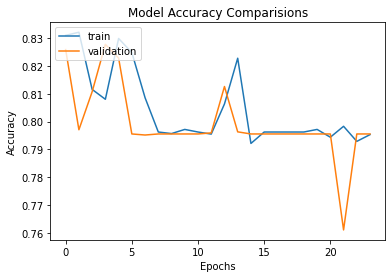

In [ ]:
# Summarize the history for accuracy comparing test and validation accuracies.
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy Comparisions')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')
plt.show()

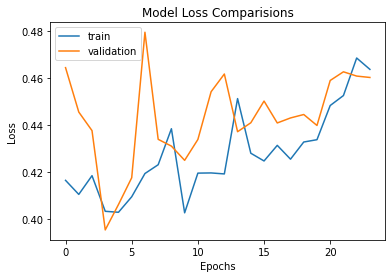

In [ ]:
# Summarizing the loss graphs of training and validation data.
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss Comparisions')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Making predictions for test data and finding out model score.
y_pred = model.predict(X_test)
# Converting outputs to 0,1.
y_pred = (y_pred >= 0.5)  # If it returns true, 1 gets into the place, else 0 gets into place.

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Make the confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1546,   49],
       [ 234,  171]])

In [ ]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred,y_test)


In [ ]:
score

0.8585

In [ ]:
print(classification_report(y_test, y_pred))